In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import umap

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [38]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [39]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [40]:
print("training set images shape: ", x_train.shape)
print("training set labels shape: ", y_train.shape)
print("test set images shape: ", x_test.shape)
print("test set labels shape: ", y_test.shape)

training set images shape:  (60000, 28, 28)
training set labels shape:  (60000,)
test set images shape:  (10000, 28, 28)
test set labels shape:  (10000,)


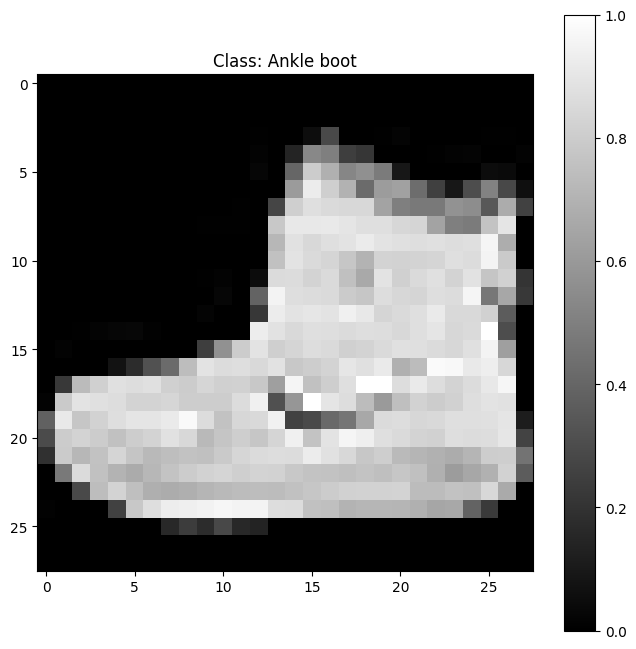

In [41]:
# display the first image from the training set
plt.figure(figsize=(8, 8))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Class: {class_names[y_train[0]]}")
plt.colorbar()
plt.grid(False)
# plt.show()

In [42]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [43]:
shape = x_test.shape[1:]

In [44]:
latent_dim64 = 64
autoencoder64 = Autoencoder(latent_dim64, shape)

In [45]:
latent_dim2 = 2
autoencoder2 = Autoencoder(latent_dim2, shape)

In [46]:
latent_dim_miss = 64
autoencoder_miss = Autoencoder(latent_dim_miss, shape)

# what is an the purpose of the encoder?

# the encoder part of an autoencoder learns to compress the input into a smaller encoding
# this encoding reduced representation of the input but captures its salient features.essentially
# the encoder transforms the input into a latent space representation. it learns to preserve only the aspects
# of the data that are most important for reconstructing it

# what is the purpose of the decoder?

# the decoder takes the encoding provided by the encoder and attempts to recreate the original input using
# this reduced representation. the goal of the decoder is to reverse the process of the encoder, reconstructing
# the input data as accurately as possible from the compressed code


# what type of loss are we using and what does it do?

# autoencoders typically use a reconstruction loss to train the network, which measures how well the decoders
# output matches the original input. the common types 

In [47]:
autoencoder64.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [48]:
autoencoder64.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0239 - val_loss: 0.0134
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0093 - val_loss: 0.0093


In [49]:
autoencoder2.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 2s 959us/step - loss: 0.0702 - val_loss: 0.0571
Epoch 2/5
1875/1875 [==============================] - 1s 705us/step - loss: 0.0531 - val_loss: 0.0490
Epoch 3/5
1875/1875 [==============================] - 1s 752us/step - loss: 0.0470 - val_loss: 0.0454
Epoch 4/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.0450 - val_loss: 0.0445
Epoch 5/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.0445 - val_loss: 0.0444


In [50]:
encoded_imgs64 = autoencoder64.encoder(x_test).numpy()
decoded_imgs64 = autoencoder64.decoder(encoded_imgs64).numpy()

In [51]:
encoded_imgs2 = autoencoder2.encoder(x_test).numpy()
decoded_imgs2 = autoencoder2.decoder(encoded_imgs2).numpy()

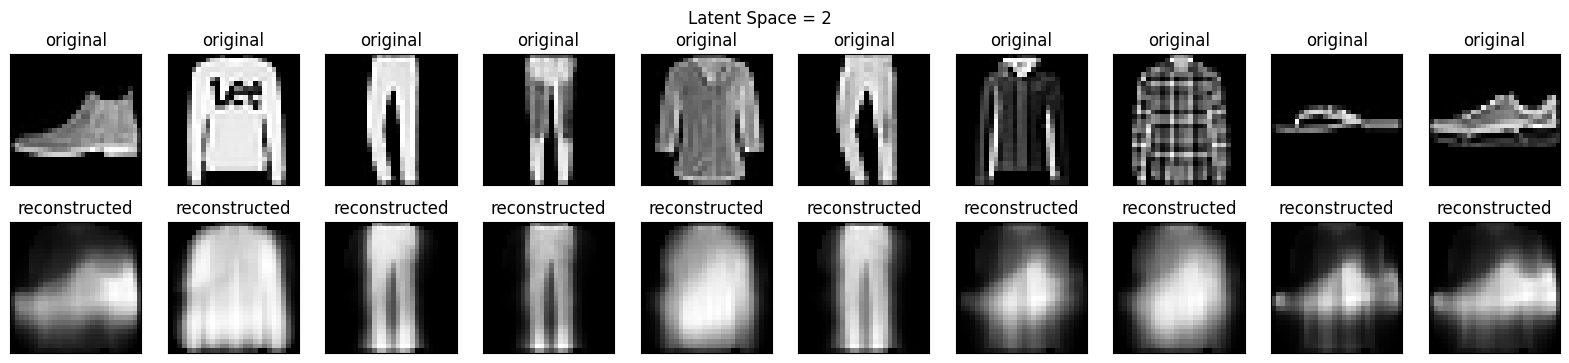

In [52]:
# visualization of the results

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs2[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Latent Space = 2')
plt.show()

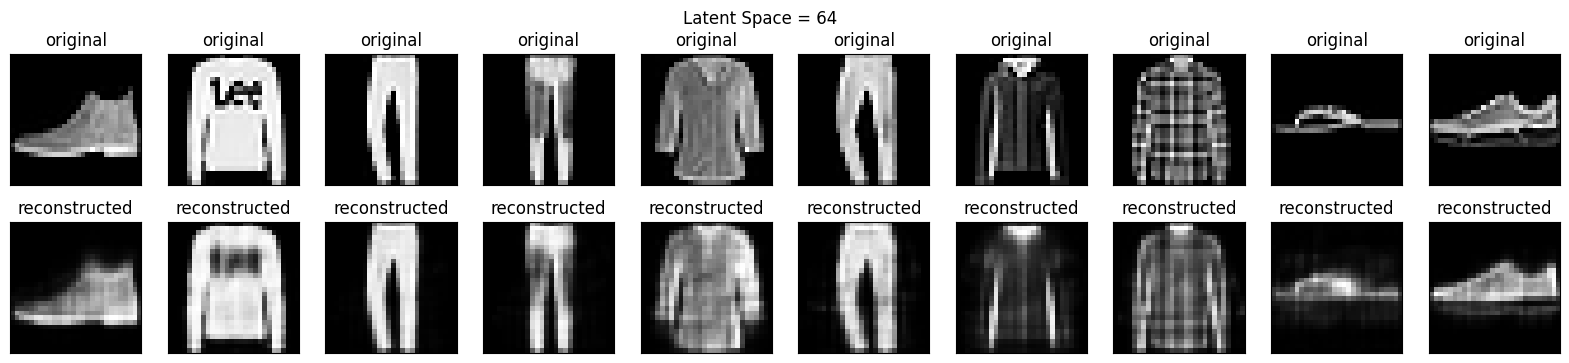

In [53]:
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs64[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('Latent Space = 64')
plt.show()

In [54]:
# visualization latent space dim=2


In [55]:
# select a random amount of points to avoid plotting all points
idx = np.random.choice(len(x_test), 1000)

In [56]:
images = x_test[idx]
encodings = encoded_imgs2[idx]
labels = y_test[idx]

(1000, 2)


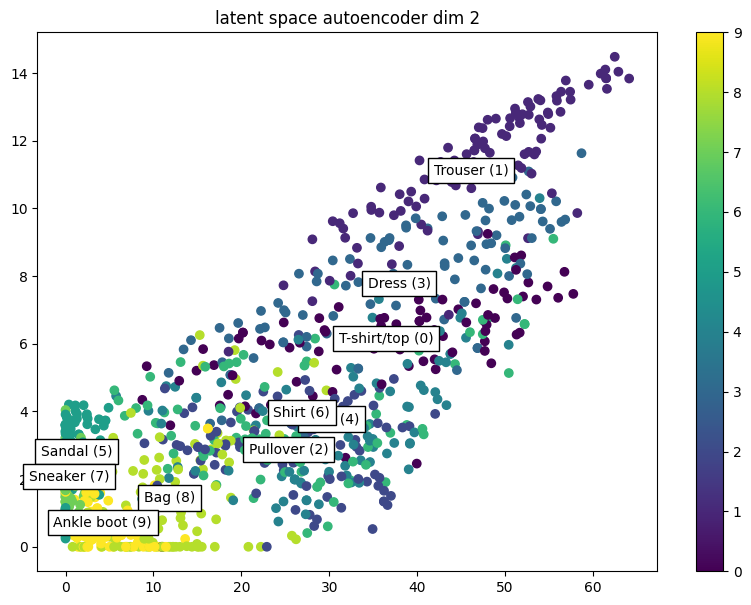

In [57]:
print(encodings.shape)
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("latent space autoencoder dim 2")
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels,cmap = "viridis")
plt.colorbar()
for i in range(10):
    class_center = np.mean(encodings[labels == i], axis=0)
    text = TextArea('{} ({})'.format(class_names[i], i))
    ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
    ax.add_artist(ab)
plt.show()

In [58]:
# learning to fill missing patches

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [60]:
# Function to create a masked version of the images with a 10x10 block set to zero
def create_masked_images(images):
    masked_images = images.copy()
    center_x, center_y = images.shape[1] // 2, images.shape[2] // 2
    half_block_size = 5  # Since the block is 10x10
    masked_images[:, center_x-half_block_size:center_x+half_block_size, center_y-half_block_size:center_y+half_block_size] = 0
    return masked_images

In [61]:
# Create masked training and test sets
x_train_m = create_masked_images(x_train)
x_test_m = create_masked_images(x_test)

In [62]:
# Define the autoencoder class as previously
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [63]:
# Instantiate the autoencoder model
shape = x_test.shape[1:]
latent_dim = 64  # Choose the appropriate latent dimension
autoencoder = Autoencoder(latent_dim, shape)

In [64]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train_m, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test_m, x_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0248 - val_loss: 0.0145
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0104 - val_loss: 0.0104


In [65]:
# Predict the masked test set
decoded_imgs = autoencoder.predict(x_test_m)

313/313 [==============================] - 0s 588us/step


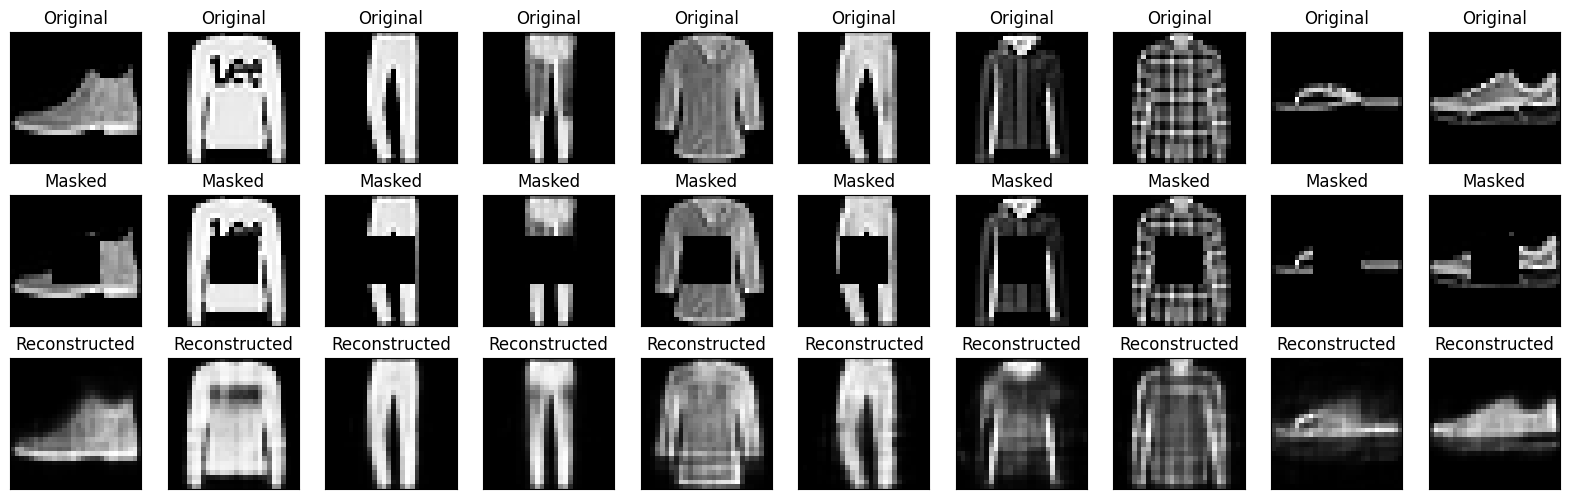

In [66]:
# Visualization of the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Masked
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_m[i], cmap='gray')
    plt.title("Masked")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Reconstruction
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()